<a href="https://colab.research.google.com/github/Jake-Andrews/computer-vision/blob/master/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive install Ultralytics

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.5/749.5 kB 11.0 MB/s eta 0:00:00


# Modifying WIDERFACE dataset/testing

## Testing YOLO

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab')

In [ ]:
!pwd

/content/drive/MyDrive/Colab


100%|██████████| 6.23M/6.23M [00:00<00:00, 98.9MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs

image 1/1 /content/bus.jpeg: 640x480 4 persons, 1 bus, 1 stop sign, 207.7ms
Speed: 7.8ms preprocess, 207.7ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 480)


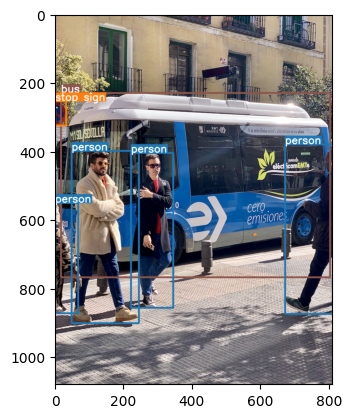

In [9]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.info()
results = model('bus.jpeg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    prop_cycle = plt.rcParams['axes.prop_cycle']
    hex2rgb = lambda h: tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
    color_lut = [hex2rgb(h) for h in prop_cycle.by_key()['color']]
    annotator.box_label(b, model.names[int(c)], color=color_lut[int(c)% len(color_lut)])

plt.imshow(annotator.result())

## Removing unneeded data from annotation text file (values for blur, occlusion, etc...)

*del_values_files example:*
1 2 3 4 1 2 3 4 5 6
First 4 are bounding box last 6 are values for occlusion, illumination, pose, etc...unwanted for a simple face detection model
**Before**

0--Parade/0_Parade_marchingband_1_849.jpg

1

449 330 122 149 0 0 0 0 0 0

0--Parade/0_Parade_Parade_0_904.jpg

1

361 98 263 339 0 0 0 0 0 0

**After**

0--Parade/0_Parade_marchingband_1_849.jpg

1

449 330 122 149

0--Parade/0_Parade_Parade_0_904.jpg

1

361 98 263 339

In [ ]:
# Remove all the unwanted rows from the annotations text file
def del_values_files(input_file_path, output_file_path):
  # Read the content from the input file
  with open(input_file_path, 'r') as file:
      lines = file.read().strip().split('\n')

  # Process the lines
  modified_lines = []
  for line in lines:
      parts = line.split()
      # If this line has 10 numbers, keep only the first 4
      if len(parts) == 10:
          modified_line = ' '.join(parts[:4])
          modified_lines.append(modified_line)
      else:
          modified_lines.append(line)

  # Join the modified lines back into a single string
  modified_text_content = '\n'.join(modified_lines)

  # Write the modified content to the output file
  with open(output_file_path, 'w') as file:
      file.write(modified_text_content)


In [ ]:
# Files to run the above function on
input_file_path = os.path.join(os.getcwd(), 'wider_face_split/wider_face_train_bbx_gt.txt')
output_file_path = os.path.join(os.getcwd(), 'wider_face_split/wider_face_train_bbx_gt_modified.txt')
del_values_files(input_file_path, output_file_path)

input_file_path = os.path.join(os.getcwd(), 'wider_face_split/wider_face_val_bbx_gt.txt')
output_file_path = os.path.join(os.getcwd(), 'wider_face_split/wider_face_val_bbx_gt_modified.txt')
del_values_files(input_file_path, output_file_path)

## Change WIDERFACE (Dataset's) Folder structure

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab'

In [ ]:
print(os.path.join('.', 'sneed'))

./sneed


In [ ]:
print(os.listdir('./'))

['bus.jpeg', 'WIDER_val', 'WIDER_test', 'wider_face_split', 'WIDER_train', 'yolov8n.pt', 'images']


In [ ]:
# @title
import os
import shutil

# Define the root directory where the original folders are located
root_directory = '/content/drive/MyDrive/Colab'

# Define the new top-level Images directory
new_images_dir = os.path.join(root_directory, 'images')

# Make sure the new Images directory exists
if not os.path.exists(new_images_dir):
    os.mkdir(new_images_dir)

# List of original directories
original_dirs = ['WIDER_train', 'WIDER_test', 'WIDER_val']

for original_dir in original_dirs:
    # Path to the original directory's images folder
    original_images_path = os.path.join(root_directory, original_dir, 'images')
    print(original_images_path)
    # New directory for the images
    new_dir_path = os.path.join(new_images_dir, original_dir)
    if not os.path.exists(new_dir_path):
        os.mkdir(new_dir_path)
    print(new_dir_path)
    # Iterate over each subdirectory in the original images directory
    print(os.listdir(original_images_path))
    for subdir_name in os.listdir(original_images_path):
        subdir_path = os.path.join(original_images_path, subdir_name)
        print(subdir_path)
        # Check if it's a directory
        if os.path.isdir(subdir_path):
            # Iterate over each file in the subdirectory
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)
                # Move each file to the new directory
                shutil.move(file_path, new_dir_path)

            # Once all files are moved, remove the subdirectory
            os.rmdir(subdir_path)
            #print(f"Moved all files from {subdir_name} and removed the directory.")

print("Directory restructuring completed.")

/content/drive/MyDrive/Colab/WIDER_train/images
/content/drive/MyDrive/Colab/images/WIDER_train
[]
/content/drive/MyDrive/Colab/WIDER_test/images
/content/drive/MyDrive/Colab/images/WIDER_test
[]
/content/drive/MyDrive/Colab/WIDER_val/images
/content/drive/MyDrive/Colab/images/WIDER_val
[]
Directory restructuring completed.


## Create Dataset Format for Ultralytics

Now use the modified files to create the format that ultralytics requires for it's datasets: https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#21-create-datasetyaml.

Each row in the text file will look as follows, with the text files name being the name of the image with .txt extension. And the path being the same as the image, except under an images folder.
ie: (same root directory)

labels -> test & train & val (each folder containing images)

images -> test & train & val (each folder containing text files)

File format:

x x x x x

class_id center_x center_y width height

normalize bounding box values to a range of (0,1)


In [ ]:
# @title
# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov8(image_details, rootpath='.', write_to_file=False):
    print_buffer = []

    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())

        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])

        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]
        b_center_x /= image_w
        b_center_y /= image_h
        b_width    /= image_w
        b_height   /= image_h

        #Write the bbox details to the file
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))

    if write_to_file:
        # Name of the file which we have to save
        save_file_name = os.path.join(rootpath, "annotations", info_dict["filename"].replace("png", "txt"))

        # Save the annotation to disk
        print("\n".join(print_buffer), file= open(save_file_name, "w"))
    else:
        return print_buffer

In [ ]:
from PIL import Image

# Accepts a list containing information from one image from the
# Wideface dataset in the above format
def to_ultralytics_format(image_info, train_test_val_dir, root_dir='.', write_to_file=False):
  print_buffer = []
  # Extract the filename
  # I removed the subfolders each image was in...annotations contain a subfolder
  # Ie: 0--Parade/0_Parade_marchingband_1_117.jpg -> 0_Parade_marchingband_1_117.jpg
  # Extract the filename and remove the subfolder
  image_filename = image_info[0].split('/', 1)[-1]

  # Create the images full filepath
  image_filepath = os.path.join(root_dir, 'images', train_test_val_dir, image_filename)

  # Change the filename extension to .txt for the output file
  output_filename = image_filename.replace('.jpg', '.txt')

  # Process and write the normalized bounding box information
  for bbox in image_info[2:]:  # Skip the filename and count
      x, y, b_width, b_height = [int(value) for value in bbox.split()]

      #Calculate values that ultralytics needs from what was given
      #x center value of image, y center value
      '''
      0--Parade/0_Parade_marchingband_1_849.jpg
      1
      449 330 122 149 (This is in the form of x_min, y_min, width, height)
      '''
      b_center_x = x + (b_width / 2)
      b_center_y = y + (b_height / 2)

      # Use PIL to open the image and get its dimensions
      with Image.open(image_filepath) as img:
          image_w, image_h = img.size

      # Normalize the bounding box values
      b_center_x_norm = b_center_x / image_w
      b_center_y_norm = b_center_y / image_h
      b_width_norm    = b_width / image_w
      b_height_norm   = b_height / image_h

      # Write the normalized bounding box to the file (0 for face class)
      print_buffer.append(f"0 {b_center_x_norm:.3f} {b_center_y_norm:.3f} {b_width_norm:.3f} {b_height_norm:.3f}")

  if write_to_file:
    #print("sneed")
    # Path to the text file to save to
    save_file_path = os.path.join(root_dir, "annotations", train_test_val_dir, output_filename)

    # Save the annotation
    with open(save_file_path, "w") as file:
        file.write("\n".join(print_buffer) + "\n")
  else:
      save_file_path = os.path.join(root_dir, "annotations", train_test_val_dir, output_filename)
      print("\n".join(print_buffer))
      print(f"Processed bounding boxes written to {output_filename}")
      print(f"Filename path: {save_file_path}")

In [ ]:
# @title
#Code to test the above method
import os
# Given a list containing the data from a text file, where each row in the text
# file corresponds to a element in the list. Calculate the normalized
# bounding boxes for each bounding box and save to an annotations txt file in
# with the same name as the image and in the same folder structure with
# respect to it's structure from the root images folder it is contained in.
test_list = ["0--Parade/0_Parade_marchingband_1_117.jpg",
    "9",
    "69 359 50 36",
    "227 382 56 43",
    "296 305 44 26",
    "353 280 40 36",
    "885 377 63 41",
    "819 391 34 43",
    "727 342 37 31",
    "598 246 33 29",
    "740 308 45 33"]
#Root path is the path that contains your images and (empty) annotations folders.
dir_list = ['WIDER_val', 'WIDER_test', 'WIDER_train']
to_ultralytics_format(test_list, dir_list[2], os.getcwd(), False)

0 0.092 0.553 0.049 0.053
0 0.249 0.592 0.055 0.063
0 0.311 0.466 0.043 0.038
0 0.364 0.437 0.039 0.053
0 0.895 0.583 0.062 0.060
0 0.816 0.605 0.033 0.063
0 0.728 0.524 0.036 0.045
0 0.600 0.382 0.032 0.043
0 0.745 0.476 0.044 0.048
Processed bounding boxes written to 0_Parade_marchingband_1_117.txt
Filename path: /content/drive/MyDrive/Colab/annotations/WIDER_train/0_Parade_marchingband_1_117.txt


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab'

In [ ]:
#Create the folder structure required
folder_names = ['WIDER_test', 'WIDER_train', 'WIDER_val']
for folder_name in folder_names:
  new_dir_path = os.path.join(os.getcwd(), 'annotations', folder_name)
  if not os.path.exists(new_dir_path):
      os.mkdir(new_dir_path)
      print(f'Directory created: {new_dir_path}')

Directory created: /content/drive/MyDrive/Colab/annotations/WIDER_test
Directory created: /content/drive/MyDrive/Colab/annotations/WIDER_train
Directory created: /content/drive/MyDrive/Colab/annotations/WIDER_val


In [ ]:
from PIL import Image
import os
# This function is used to process the text file that contains all of the
# filenames and bounding boxes. All the labels are contained in 1 txt file.
def process_dataset_annotations(root_dir):
    # Adjust for each dataset
    #annotations_file = 'wider_face_train_bbx_gt_modified.txt'
    annotations_file = 'wider_face_val_bbx_gt_modified.txt'
    annotations_dir = 'wider_face_split'
    #train_test_val_dir = 'WIDER_train'
    train_test_val_dir = 'WIDER_val'

    # Full path to the annotations text file
    file_path = os.path.join(root_dir, annotations_dir, annotations_file)

    # Read the file and process the content
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Initialize a list to keep track of each image's annotations
    image_description_list = []
    bbox_count = -1

    # Process the file content line by line
    for line in lines:
        line = line.strip()
        if '--' in line:  # This indicates a new image file entry
            if image_description_list:
                # Call the processing function for the previous image
                to_ultralytics_format(image_description_list, train_test_val_dir, root_dir, True)
                image_description_list = []  # Reset the list for the next image description
            image_description_list.append(line)  # Start with the file name
        elif line.isdigit():  # This indicates the bbox count
            bbox_count = int(line)
        else:
            # Add the bounding box to the current image's description list
            image_description_list.append(line)
            bbox_count -= 1
            if bbox_count == 0:
                to_ultralytics_format(image_description_list, train_test_val_dir, root_dir, True)
                image_description_list = []  # Reset for the next image description

    # Make sure to process the last image description if the file doesn't end with a new image file entry
    if image_description_list:
        to_ultralytics_format(image_description_list, train_test_val_dir, root_dir, True)

# Example usage, assuming the current working directory is the root:
process_dataset_annotations('.')
# Assuming 'Colab' is your root directory and 'annotations' is the directory where your annotations are.
#process_widerface_dataset_to_ultralytics('Colab', 'WIDER_train', 'annotations', 'wider_face_train_bbx_gt_modified.txt')


## Code to move files from google drive to google colab

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab'

Training was unbearably slow.
Google drive speeds are awful.
This code copies the files from google drive to a google colab session for hopefully much faster training.
edit: This was faster, but file should be zipped for faster transfer speeds.

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the folder in Google Drive you want to copy
source_folder = '/content/drive/My Drive/Colab/WIDER_FACE'

# Specify the destination path in the Colab content directory
destination_folder = '/content/WIDER_FACE'

# Copy the folder using shutil.copytree()
if not os.path.exists(destination_folder):  # Check if the destination folder doesn't already exist
    shutil.copytree(source_folder, destination_folder)
    print(f"Folder {source_folder} copied to {destination_folder}")
else:
    print(f"Destination folder {destination_folder} already exists.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder /content/drive/My Drive/Colab/WIDER_FACE copied to /content/WIDER_FACE


Same as above but with a zip file.

In [21]:
from google.colab import drive
import zipfile

# Mount Google Drive
drive.mount('/content/drive')

# Move zip files from gdrive to gcolab
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/data/images.zip")
zip_ref1 = zipfile.ZipFile("/content/drive/MyDrive/data/labels.zip")

zip_ref.extractall("/content/dataset")
zip_ref.close()
print("Copied images.zip")

zip_ref1.extractall("/content/dataset")
zip_ref1.close()
print("Copied labels.zip")

# Move other necessary files (model/dataset)
import shutil

source_dir = '/content/drive/MyDrive/data/'
destination_dir = '/content'

files_to_move = ['wider_face.yaml', 'yolov8n.pt', 'bus.jpeg', 'star_short.webm', 'starship_troopers.webm', 'Starship_Troopers_Battle_of_Klendathu_480p.webm', 'Starship_Troopers_Battle_of_Klendathu.webm', 'Silicon_Valley_S01E01.mp4', 'Silicon_Valley_S01E01_HQ.mkv']

# Move each file to the destination directory
for filename in files_to_move:
    source_path = f"{source_dir}/{filename}"
    destination_path = f"{destination_dir}/{filename}"
    shutil.copy(source_path, destination_path)
    print(f"Copied {filename} from {source_dir} to {destination_dir}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied wider_face.yaml from /content/drive/MyDrive/data/ to /content
Copied yolov8n.pt from /content/drive/MyDrive/data/ to /content
Copied bus.jpeg from /content/drive/MyDrive/data/ to /content
Copied star_short.webm from /content/drive/MyDrive/data/ to /content
Copied starship_troopers.webm from /content/drive/MyDrive/data/ to /content
Copied Starship_Troopers_Battle_of_Klendathu_480p.webm from /content/drive/MyDrive/data/ to /content
Copied Starship_Troopers_Battle_of_Klendathu.webm from /content/drive/MyDrive/data/ to /content
Copied Silicon_Valley_S01E01.mp4 from /content/drive/MyDrive/data/ to /content
Copied Silicon_Valley_S01E01_HQ.mkv from /content/drive/MyDrive/data/ to /content


# YOLOv8n model training

In [1]:
import os
os.chdir('/content')

In [2]:
os.getcwd()

'/content'

10.3gb cache required for train, 2.3gb for val (images are stored in system RAM not GPU). Speeds up computation quite a bit. batch -1 lets ultralytics decide what batch size to use depending on GPU memory, can only be used for train and not val.

In [9]:
from ultralytics import YOLO
data = "/content/wider_face.yaml"
model = YOLO('/content/yolov8n.pt')
epochs = 20

results = model.train(data=data, epochs=epochs, batch=-1, save_period = 5, project = '/content/drive/MyDrive/model', imgsz=192, save=True, cache=True)
metrics = model.val(data=data, batch=64, imgsz=192, cache=True)
#conf=0.001, iou=0.6, max_det=300,
model.export()
metrics

Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/wider_face.yaml, epochs=20, time=None, patience=100, batch=-1, imgsz=192, save=True, save_period=5, cache=True, device=None, workers=8, project=/content/drive/MyDrive/model, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

train: Scanning /content/dataset/labels/WIDER_train.cache... 12880 images, 4635 backgrounds, 1 corrupt: 100%|██████████| 12880/12880 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/dataset/images/WIDER_train/2_Demonstration_Protesters_2_231.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset/images/WIDER_train/37_Soccer_Soccer_37_851.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset/images/WIDER_train/54_Rescue_rescuepeople_54_141.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset/images/WIDER_train/54_Rescue_rescuepeople_54_29.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.025]
train: WARNING ⚠️ /content/dataset/images/WIDER_train/7_Cheering_Cheering_7_17.jpg: 1 duplicate labels removed



train: Caching images (0.9GB True): 100%|██████████| 12879/12879 [00:22<00:00, 585.34it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/labels/WIDER_val.cache... 3226 images, 1122 backgrounds, 1 corrupt: 100%|██████████| 3226/3226 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/WIDER_val/21_Festival_Festival_21_604.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/dataset/images/WIDER_val/39_Ice_Skating_iceskiing_39_583.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]



val: Caching images (0.2GB True): 100%|██████████| 3225/3225 [00:05<00:00, 543.84it/s]


Plotting labels to /content/drive/MyDrive/model/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 192 train, 192 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/model/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.868G      2.761      2.101      1.072        393        192: 100%|██████████| 805/805 [01:19<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:12<00:00,  8.31it/s]


                   all       3225      36450       0.43      0.105       0.11     0.0411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.797G      2.594      1.749     0.9915        145        192: 100%|██████████| 805/805 [01:13<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.05it/s]


                   all       3225      36450       0.36      0.124      0.109     0.0425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.782G      2.552      1.708     0.9839        219        192: 100%|██████████| 805/805 [01:11<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.14it/s]


                   all       3225      36450      0.404      0.135      0.123     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.801G      2.486      1.664     0.9664        150        192: 100%|██████████| 805/805 [01:10<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.09it/s]


                   all       3225      36450      0.385      0.147       0.13     0.0478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      0.78G      2.401      1.605     0.9537         81        192: 100%|██████████| 805/805 [01:11<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.01it/s]


                   all       3225      36450      0.423      0.161      0.155     0.0593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.778G      2.337      1.577     0.9535         95        192: 100%|██████████| 805/805 [01:10<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.09it/s]


                   all       3225      36450      0.427      0.165      0.153     0.0573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.782G      2.295      1.522     0.9415         65        192: 100%|██████████| 805/805 [01:10<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.04it/s]


                   all       3225      36450      0.443      0.166      0.162     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.799G      2.262      1.499     0.9381        237        192: 100%|██████████| 805/805 [01:09<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:10<00:00,  9.22it/s]

                   all       3225      36450      0.486      0.163       0.17     0.0665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.778G      2.254      1.492     0.9323        143        192: 100%|██████████| 805/805 [01:10<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  8.92it/s]

                   all       3225      36450      0.488      0.161       0.17     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.778G      2.225      1.464     0.9305        131        192: 100%|██████████| 805/805 [01:10<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.14it/s]

                   all       3225      36450      0.457      0.176      0.175     0.0722


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.921G      2.168       1.42     0.9376        135        192: 100%|██████████| 805/805 [01:12<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  8.94it/s]


                   all       3225      36450      0.457      0.172      0.166      0.069

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.799G      2.133      1.376     0.9334         76        192: 100%|██████████| 805/805 [01:10<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.14it/s]


                   all       3225      36450      0.473      0.177      0.176     0.0722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.778G      2.116      1.353     0.9309         67        192: 100%|██████████| 805/805 [01:10<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.03it/s]


                   all       3225      36450      0.469      0.181      0.178     0.0745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.778G      2.099       1.34     0.9319        107        192: 100%|██████████| 805/805 [01:11<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.04it/s]

                   all       3225      36450      0.471      0.183      0.181     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.778G      2.071       1.31     0.9232        198        192: 100%|██████████| 805/805 [01:10<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  8.98it/s]


                   all       3225      36450      0.492      0.182      0.183     0.0785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.799G      2.055      1.298     0.9196        129        192: 100%|██████████| 805/805 [01:10<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.08it/s]


                   all       3225      36450      0.485      0.187      0.186     0.0786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.778G       2.04      1.282     0.9148         30        192: 100%|██████████| 805/805 [01:10<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.14it/s]

                   all       3225      36450      0.497      0.187      0.191     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.778G      2.014      1.254      0.913         62        192: 100%|██████████| 805/805 [01:10<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.03it/s]

                   all       3225      36450      0.501      0.187      0.195     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.778G      2.015      1.254      0.915         69        192: 100%|██████████| 805/805 [01:11<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.12it/s]

                   all       3225      36450      0.499      0.189      0.192     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.946G      1.982      1.224     0.9071         71        192: 100%|██████████| 805/805 [01:10<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:11<00:00,  9.09it/s]

                   all       3225      36450        0.5      0.191      0.198     0.0846



20 epochs completed in 0.463 hours.
Optimizer stripped from /content/drive/MyDrive/model/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/model/train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/model/train/weights/best.pt...
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 101/101 [00:15<00:00,  6.41it/s]


                   all       3225      36450        0.5      0.191      0.198     0.0846
Speed: 0.0ms preprocess, 1.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/drive/MyDrive/model/train
Ultralytics YOLOv8.1.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/labels/WIDER_val.cache... 3226 images, 1122 backgrounds, 1 corrupt: 100%|██████████| 3226/3226 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/WIDER_val/21_Festival_Festival_21_604.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/dataset/images/WIDER_val/39_Ice_Skating_iceskiing_39_583.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.002]



val: Caching images (0.2GB True): 100%|██████████| 3225/3225 [00:05<00:00, 583.24it/s]


ValueError: batch_size should be a positive integer value, but got batch_size=-1

## Model prediction

Model summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs

image 1/1 /content/bus.jpeg: 192x160 1 face, 147.8ms
Speed: 17.6ms preprocess, 147.8ms inference, 4041.4ms postprocess per image at shape (1, 3, 192, 160)


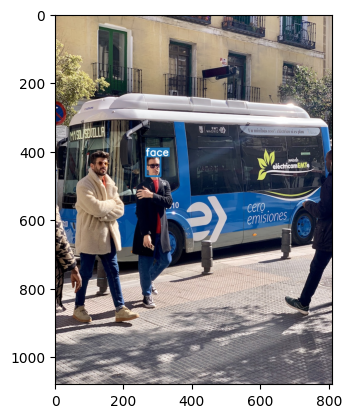

In [5]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/model/train/weights/best.pt')
model.info()
results = model('bus.jpeg')

from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
import cv2

annotator = Annotator(cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB))
boxes = results[0].boxes
for box in boxes:
    b = box.xyxy[0]  # get box coordinates in (left, top, right, bottom) format
    c = box.cls
    prop_cycle = plt.rcParams['axes.prop_cycle']
    hex2rgb = lambda h: tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))
    color_lut = [hex2rgb(h) for h in prop_cycle.by_key()['color']]
    annotator.box_label(b, model.names[int(c)], color=color_lut[int(c)% len(color_lut)])

plt.imshow(annotator.result())

# Core System Functionality

Function to load a video, sample it at intervals, and generate images of faces and facial embeddings from the images

In [2]:
pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:
pip install torchvision

In [15]:
pip install dlib

Download the pretrained model.

In [16]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2024-04-06 21:53:21--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  54.0MB/s    in 1.1s    

2024-04-06 21:53:22 (54.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



The face detector we use is made using the classic Histogram of Oriented Gradients (HOG) feature combined with a linear classifier, an image pyramid, and sliding window detection scheme. Somewhat similar to SIFT.

Note, cluster -1 is used to represent outliers.

Streaming output truncated to the last 5000 lines.
448.7237548828125, 557.2857666015625, 975.7372436523438, 1068.2437744140625
170.16543579101562, 240.09307861328125, 1467.7454833984375, 1521.553466796875
97.70797729492188, 166.8730926513672, 1810.8941650390625, 1867.899169921875
592.7096557617188, 734.9411010742188, 602.1787719726562, 715.5526733398438
141.00738525390625, 192.11219787597656, 1526.5765380859375, 1575.56884765625
361.41143798828125, 451.41021728515625, 542.4512939453125, 609.3513793945312
283.55804443359375, 371.7732238769531, 353.3343505859375, 416.71783447265625
282.6981201171875, 353.9591064453125, 351.90216064453125, 408.948974609375
245.18959045410156, 311.3316345214844, 1673.3040771484375, 1726.1239013671875
512.8141479492188, 631.5447998046875, 1251.9271240234375, 1348.6676025390625

0: 128x192 (no detections), 16.0ms
Speed: 1.3ms preprocess, 16.0ms inference, 0.5ms postprocess per image at shape (1, 3, 128, 192)

0: 128x192 (no detections), 19.4ms
Speed: 1.5ms p

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,

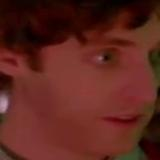
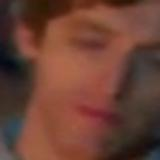
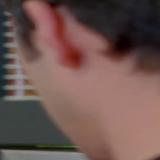
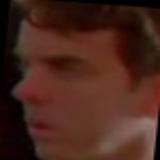
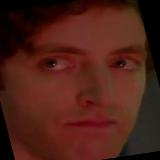
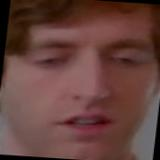
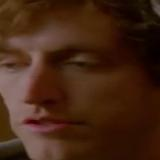
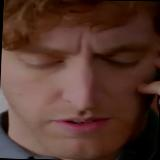
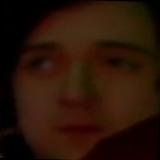
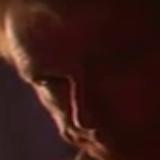
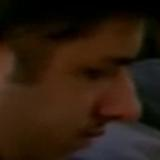
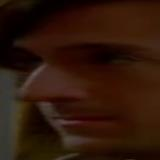
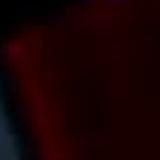
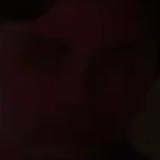
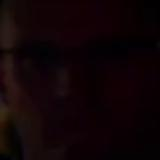
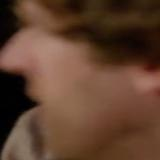
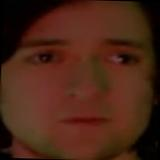
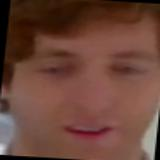
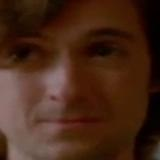
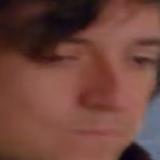
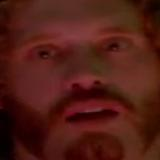
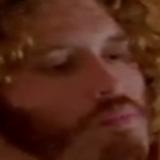
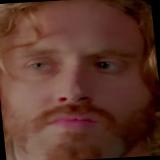
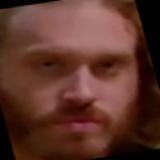
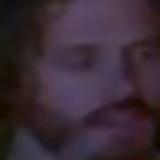
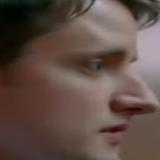
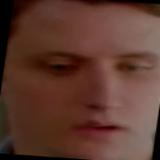
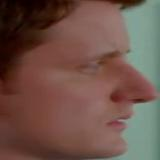
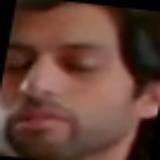
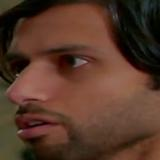
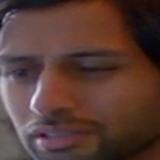
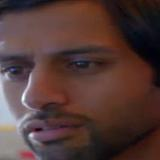
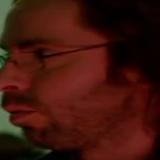
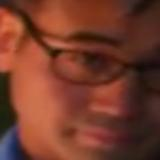
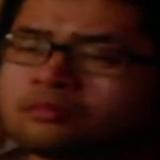
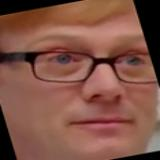
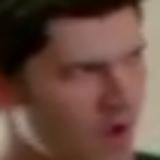
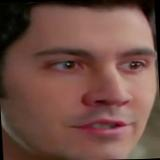
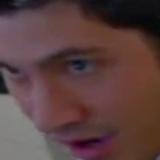
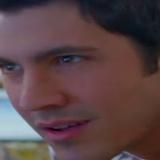
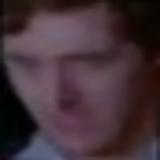
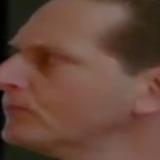
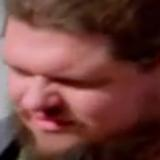
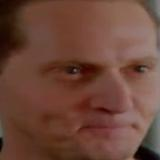
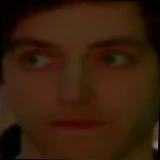
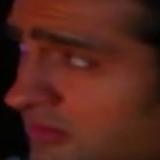
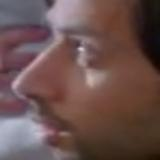
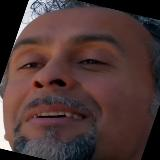

Average distance between embeddings: 1.2367217540740967
Standard deviation of distances between embeddings: 0.2702964246273041


In [2]:
import cv2
import numpy as np
import torch
from facenet_pytorch import InceptionResnetV1
from ultralytics import YOLO
from sklearn.cluster import DBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
import base64
from io import BytesIO
from PIL import Image
from IPython.display import HTML
import dlib
from sklearn.metrics import pairwise_distances

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def align_face(image):
    rects = detector(image, 1)

    for rect in rects:  # Assuming the first detected face
        shape = predictor(image, rect)
        shape = np.array([[p.x, p.y] for p in shape.parts()])

        # Calculate the center of the two eyes
        leftEye = np.mean(shape[36:42], axis=0)
        rightEye = np.mean(shape[42:48], axis=0)
        dY = rightEye[1] - leftEye[1]
        dX = rightEye[0] - leftEye[0]
        angle = np.degrees(np.arctan2(dY, dX))  # Corrected line

        # Calculate the center of the face
        center = np.mean(shape, axis=0)

        # Make sure center coordinates are integer
        center = (int(center[0]), int(center[1]))

        # Calculate the rotation matrix and apply it
        rotMat = cv2.getRotationMatrix2D(center, angle, 1.0)
        aligned = cv2.warpAffine(image, rotMat, image.shape[1::-1], flags=cv2.INTER_CUBIC)

        return aligned  # Return the first aligned face for simplicity

    # If no faces were detected by dlib, return the original image
    return image



def encode_image_for_html(image):
    """Encode a numpy array as a base64 string for HTML display."""
    # Convert the image to RGB (OpenCV uses BGR by default)
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    buff = BytesIO()
    pil_img.save(buff, format="JPEG")
    base64_str = base64.b64encode(buff.getvalue()).decode("utf-8")
    return f"data:image/jpeg;base64,{base64_str}"

def display_faces_by_cluster_html(faces, labels):
    unique_labels = set(labels)
    html_str = "<div>"
    for cluster_id in unique_labels:
        cluster_indices = [i for i, label in enumerate(labels) if label == cluster_id]
        cluster_faces = []

        # Display the number of images in the cluster
        html_str += f"<h2>Cluster {cluster_id} - {len(cluster_indices)} Images</h2>"

        if len(cluster_indices) >= 4:
            step = len(cluster_indices) // 4
            selected_indices = [cluster_indices[i * step] for i in range(4)]
            cluster_faces = [faces[i] for i in selected_indices]
        else:
            cluster_faces = [faces[i] for i in cluster_indices]

        html_str += "<table><tr>"

        for face in cluster_faces:
            img_str = encode_image_for_html(face)
            html_str += f"<td><img src='{img_str}' width='100'></td>"

        html_str += "</tr></table>"
    html_str += "</div>"
    return HTML(html_str)

# Interval represents seconds between frames
def get_frames_seconds(video_path, interval):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        current_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        if current_time % interval < 1 / fps:
            frames.append(frame)
    cap.release()
    return frames

# Interval represents number of frames to skip, ie: 5, means keep every 5th frame
def get_frames(video_path, interval):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0  # Initialize a counter for the total number of frames processed

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1  # Increment the total frame counter

        # Keep every 'interval-th' frame
        if frame_count % interval == 0:
            frames.append(frame)

    cap.release()
    return frames

def process_video(video_path, sample_interval, yolov8_model, face_embedding_model, clustering_model):
    frames = get_frames(video_path, sample_interval)
    print(f'Number of frames: {len(frames)}')

    all_embeddings = []
    all_faces = []
    frame_counter = 0

    for frame in frames:
        frame_counter += 1

        results = yolov8_model(frame) # Detect faces
        boxes = results[0].boxes # Get bboxes
        for box in boxes:
            xmin, ymin, xmax, ymax = box.xyxy[0]
            face = frame[int(ymin):int(ymax), int(xmin):int(xmax)]
            print(f'{ymin}, {ymax}, {xmin}, {xmax}')

            # Resize the face crop to the expected input size of the model (e.g., 160x160)
            face = align_face(face)
            face_resized = cv2.resize(face, (160, 160))

            # Convert from np array to torch.tensor and add a batch dimension
            face_tensor = F.to_tensor(face_resized).unsqueeze(0).to(device)

            # Generate facial embeddings then convert to numpy array
            embedding = face_embedding_model(face_tensor).detach().cpu().numpy()
            all_embeddings.append(embedding.flatten())  # Flatten embedding to 1D
            all_faces.append(face_resized)  # Store the resized face for display

            if frame_counter % 100 == 0:
              print(f'Processed {frame_counter} frames...')

    if all_embeddings:
        embeddings_array = np.vstack(all_embeddings)  # Stack embeddings
        clustering_model.fit(embeddings_array)
        labels = clustering_model.labels_

        # Display faces by cluster
        html_content = display_faces_by_cluster_html(all_faces, labels)
        display(html_content)

        # Calculate the average distance between faces from the embeddings
        distances = pairwise_distances(embeddings_array)

        # Since the distance of each point to itself is 0, we can set the diagonal to np.nan to exclude it from calculations
        np.fill_diagonal(distances, np.nan)

        mean_distance = np.nanmean(distances)
        std_distance = np.nanstd(distances)

        print(f"Average distance between embeddings: {mean_distance}")
        print(f"Standard deviation of distances between embeddings: {std_distance}")


# Program Usage
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

video_path = '/content/Silicon_Valley_S01E01.mp4'
sample_interval = 30  # save 1 frame every x number of frames
yolov8_model = YOLO('/content/drive/MyDrive/model/train/weights/best.pt') # Model to find faces
face_embedding_model = InceptionResnetV1(pretrained='vggface2').eval().to(device) # Model to generate embeddings
#clustering_model = DBSCAN(eps=0.2, min_samples=5) # Cluster the embeddings
#clustering_model = OPTICS()
clustering_model = KMeans(n_clusters=12, init='k-means++') # Cluster the embeddings

process_video(video_path, sample_interval, yolov8_model, face_embedding_model, clustering_model)